# 라이브러리(패키지) import

In [1]:
import numpy as np
import pandas as pd

# sklearn train_test_split()의 동일한 결과 출력을 위해 선언함
np.random.seed(5) # 랜덤한 숫자값이 항상 동일하게 출력되게끔 seed값 고정

## 머신러닝 프로젝트 진행 단계

### 1. 문제정의
* 농구 선수의 경기 기록을 바탕으로 그 선수의 포지션을 예측 해보기

### 2. 데이터 수집(획득)

In [3]:
# 데이터 수집 - 파이썬 프로그램 안으로 읽어오기
df = pd.read_csv('data/csv/basketball_stat.csv')

In [4]:
# 수집된 데이터 샘플을 확인
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


#### EDA(feature의 의미)
- 선수이름/ 포지션/ 한 경기당 평균 3점슛 성공횟수/ 2점슛/ 리바운드/ 어시스트/스틸/블로킹 

In [5]:
# 현재 가지고 있는 데이터에서 포지션의 갯수를 확인
df.Pos.value_counts() # Pos 시리즈 범주의 개수값

SG    50
C     50
Name: Pos, dtype: int64

### - 데이터 시각화
* 데이터 특징을 바탕으로 한 공간에 시각화함으로써 우리는 머신러닝 학습에 필요한 특징과 불필요한 특징을 쉽게 구분할 수 있다.

In [2]:
import matplotlib.pyplot as plt # 대표적인 시각화 패키지
import seaborn as sns # matplotlib가 업그레이드 된 시각화 패키지

Text(0.5, 1.0, 'STL and 2P in 2d plane')

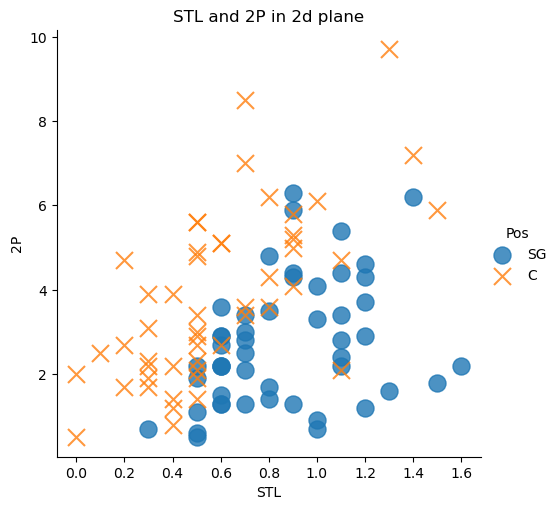

In [5]:
# 스틸, 2점슛 데이터 간의 시각화
sns.lmplot(data = df, x = 'STL', y = '2P', fit_reg = False, hue = 'Pos', markers = ['o', 'x'], scatter_kws = {'s':150}) 
# lmplot = 점의 형태로 시각화
# x축은 스틸, y축은 2점슛, 데이터는 df에서 가져올 것
# fit_reg = 라인 그리기 유무 (default는 True. False면 회귀 관련 추정선 없음. reg = 회귀관련 모델.)
# hue = Pos : Pos 데이터들을 시각화로 구별하여 출력
# markers = hue의 구별점 (Pos 범주가 두 개이므로 두 개의 마커를 지정)
# scatter_kws : 점의 크기 지정 기능

# title
plt.title('STL and 2P in 2d plane') # 2d plane = 2차원 평면

# 시각화를 해서 데이터에 대한 분포를 확인 : 공격수 / 수비수 구분이 겹쳐지는 부분이 너무 많이 발생하는 것을 확인함
# 그래서 이 데이터만을 가지고 공격수 / 수비수 구분하기에는 오류가 발생할 가능성이 높다는 것을 판단.
# = ** SG와 C를 구분하는 데 영향을 주는 데이터들이 안된다는 것을 판단 **
# 왜 많이 겹쳐지는지 / 왜 이 두 데이터를 시각화해서 봤는지 이유를 알아야함.

Text(0.5, 1.0, 'AST and 2P in 2d plane')

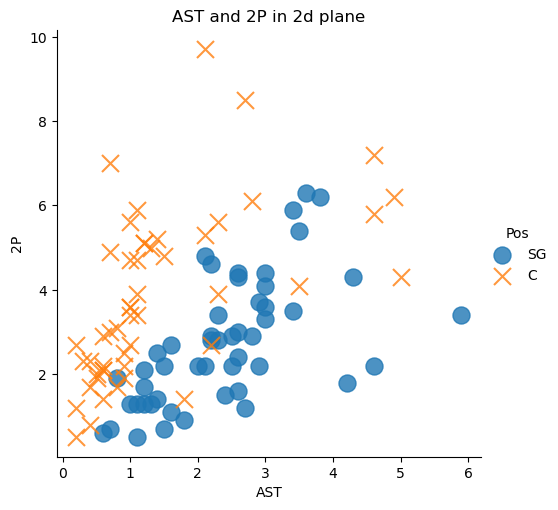

In [6]:
# 어시스트, 2점슛 데이터 간의 시각화
sns.lmplot(data = df, x = 'AST', y = '2P', fit_reg = False, hue = 'Pos', markers = ['o', 'x'], scatter_kws = {'s':150}) 

# title
plt.title('AST and 2P in 2d plane') 

# 어시스트가 점수와 2점슛간의 경계가 존재하지만 데이터 분포가 경계에 서로 너무 근접해있음 
# 경계에 몰려있다 = 비슷한 분포를 이루고 있다
# 알고리즘이 있더라도 경계에 데이터들이 너무 근접하면 좋은 모델이 나오기가 어려움

Text(0.5, 1.0, 'BLK and 3P in 2d plane')

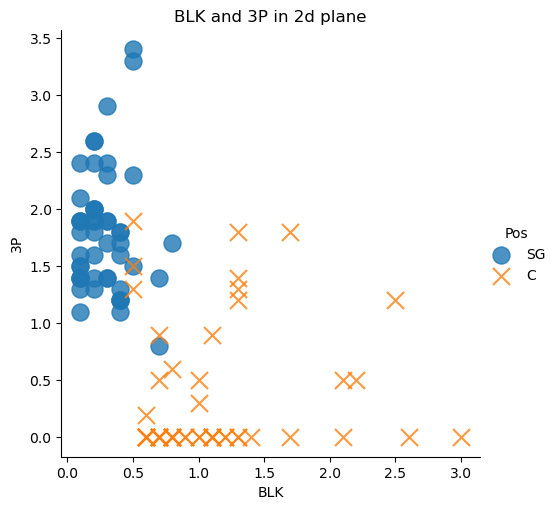

In [7]:
# 블록킹, 3점슛 데이터 간의 시각화
sns.lmplot(data = df, x = 'BLK', y = '3P', fit_reg = False, hue = 'Pos', markers = ['o', 'x'], scatter_kws = {'s':150}) 

# title
plt.title('BLK and 3P in 2d plane')

# SC와 C가 확연하게 서로 다른 한쪽으로 모여있는 것이 확인 가능 
# = 공격수 / 수비수를 구분하기 위한 높은 영향력을 가지는 feature라는 것이 확인 가능
# 특히 분류 알고리즘에서는 데이터의 경계가 확실히 구별되느냐가 중요! 
# 경계에 근접한 데이터들을 학습시키면 오히려 오류를 낼 확률을 높이게 됨

In [ ]:
# 리바운드, 3점슛 데이터 간의 시각화
sns.lmplot(data = df, x = 'TRB', y = '3P', fit_reg = False, hue = 'Pos', markers = ['o', 'x'], scatter_kws = {'s':150}) 

# title
plt.title('TRB and 3P in 2d plane')

# Center 선수들이 리바운드 분포가 넓게 위치하고 있으면서 3점슛 분포는 낮다
# SG 선수들은 3점슛 분포는 넓지만 리바운드 분포가 낮음.
# 블로킹/3점슛과 마찬가지로 두 feature 간의 특징이 극명하게 드러나고 있음 = 선수를 구분하는 데 높은 비중을 가지는 feature인 것!

### - 데이터 다듬기(전처리)

In [9]:
# 분별력이 없는 속성(feature)을 데이터에서 제거.

df.drop(['2P', 'AST', 'STL'], axis = 1, inplace = True) 
# 컬럼 항목을 제거할 때는 axis = 1을 표시하기 (default는 행 제거)
# inplace = True : 제거된 결과를 df에 업데이트
df.head()

# 전체 데이터 중 7~80%만을 학습에 사용함. 
# 나머지 20~30%는 예측모델이 한 번도 보지 못한 데이터를 얼만큼의 정확도를 가지고 평가하는지를 확인하기 위한 용도로 사용.
# 현재 자료에는 100개의 데이터 (C 50개, SG 50개). 7~80개의 데이터만을 예측 모델 생성할 때 사용.

# 20~30개의 자료를 뽑아낼 때도 랜덤하게 뽑아내야함.
# 알고리즘 중 사이킷런 라이브러리 안에 훈련용/테스트용을 분리시켜줄 수 있는 기능을 구현하여 제공.

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


### - 데이터 나누기(학습 데이터 / 테스트 데이터)

In [10]:
# sklearn의 train_test_split()을 사용하면 코드 한 줄로 손쉽게 데이터를 나눌 수 있다.
# anaconda prompt 설치 : conda activate tf_cpu => conda install scikit-learn
from sklearn.model_selection import train_test_split

# 다듬어진 데이터의 20%를 테스트 데이터로 분류함
train, test = train_test_split(df, test_size = 0.2) 
# train = 80% 데이터, test = 20% 데이터

In [11]:
# 학습 데이터의 갯수를 확인
train.shape[0]

80

In [12]:
# 테스트 데이터의 갯수를 확인
test.shape[0]

20

In [13]:
# 학습 데이터 저장
train.to_csv("data/csv/basketball_train.csv", index = None) # 행 이름 따로 부여 X

In [14]:
# 테스트 데이터 저장
test.to_csv("data/csv/basketball_test.csv", index = None)

### 3. 모델 구현

### 4. 검증

### 5. 테스트